<a href="https://colab.research.google.com/github/Ushosipal/rainfall_prediction/blob/main/rainfallrecommendationsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
# laoding the dataset to a pandas dataframe
data = pd.read_csv("/content/Rainfall.csv")

In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [26]:
data.shape


(366, 11)

In [7]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [8]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [9]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [11]:
# remove extra  spaces in all columns
data.columns = data.columns.str.strip()

In [12]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [13]:
#removing day column
data = data.drop(columns=["day"])

In [14]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [16]:
#checking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [17]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

✅ **Mode** **Definition**: The value(s) that appears most frequently in a data set.

Type: Can be unimodal (1 mode), bimodal (2 modes), or multimodal (more than 2 modes).



✅ **Median Definition**: The middle value of a data set when arranged in ascending or descending order.

If the number of observations is:

Odd: Median is the middle number.

Even: Median is the average of the two middle numbers.

In [20]:
#missing value handling
#winddirection is a degree value and windspeed is a numerical value

data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [21]:
#recheck
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [22]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [23]:
# converting the yes and no to 1 and 0 respectively
data["rainfall"] = data["rainfall"].map({"yes": 1, "no": 0})

In [24]:
data["rainfall"].unique()

array([1, 0])

**EDA**

In [25]:
data.shape

(366, 11)

In [27]:
# setting plot style as grids for all the plots
sns.set(style="whitegrid")

In [30]:
#descriptive statistics
#50% is the median value

data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


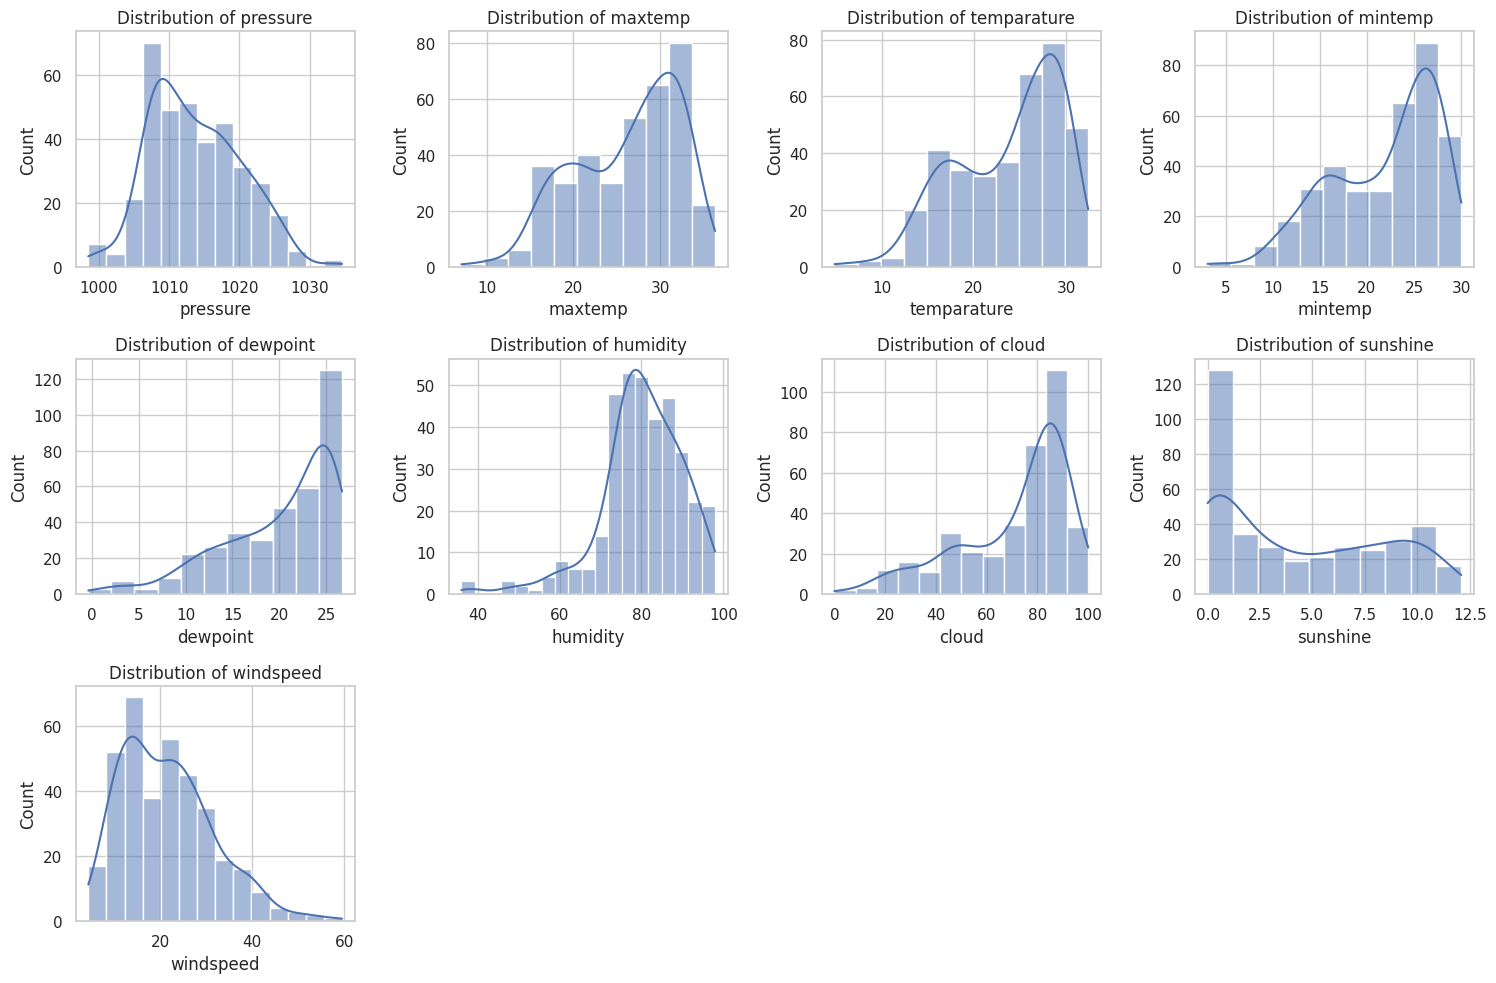

In [37]:
#base plot
plt.figure(figsize=(15, 10))

#enumerate takes value + index of each column, we are using 1 for starting index
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 4, i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

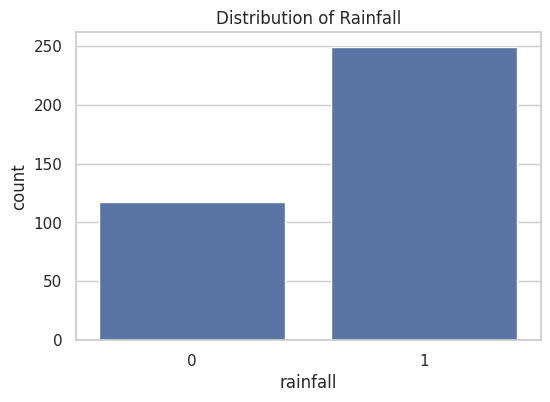

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

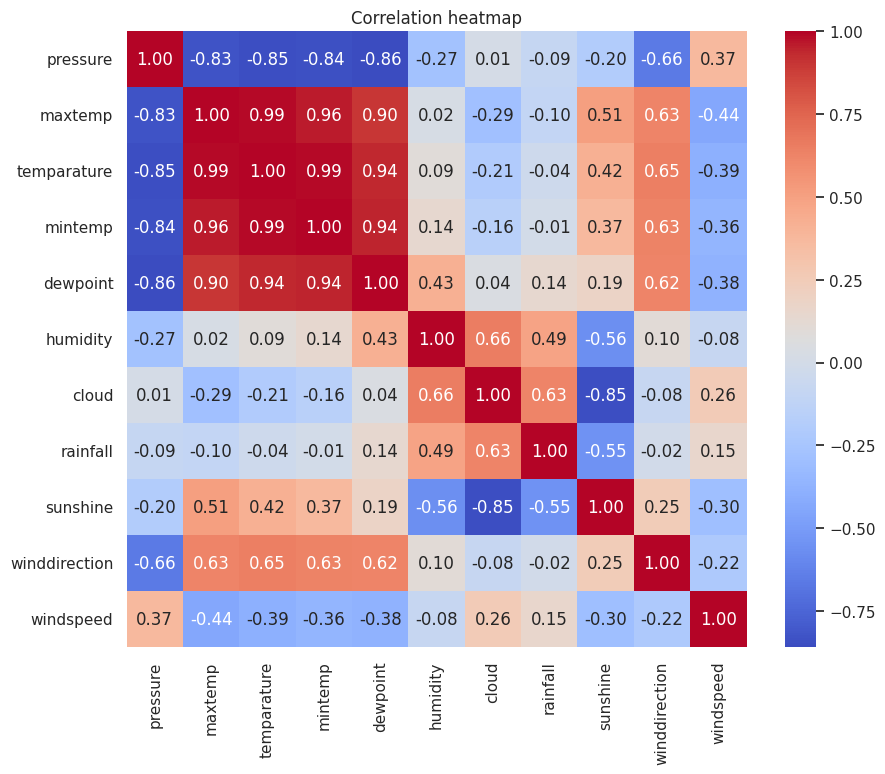

In [43]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

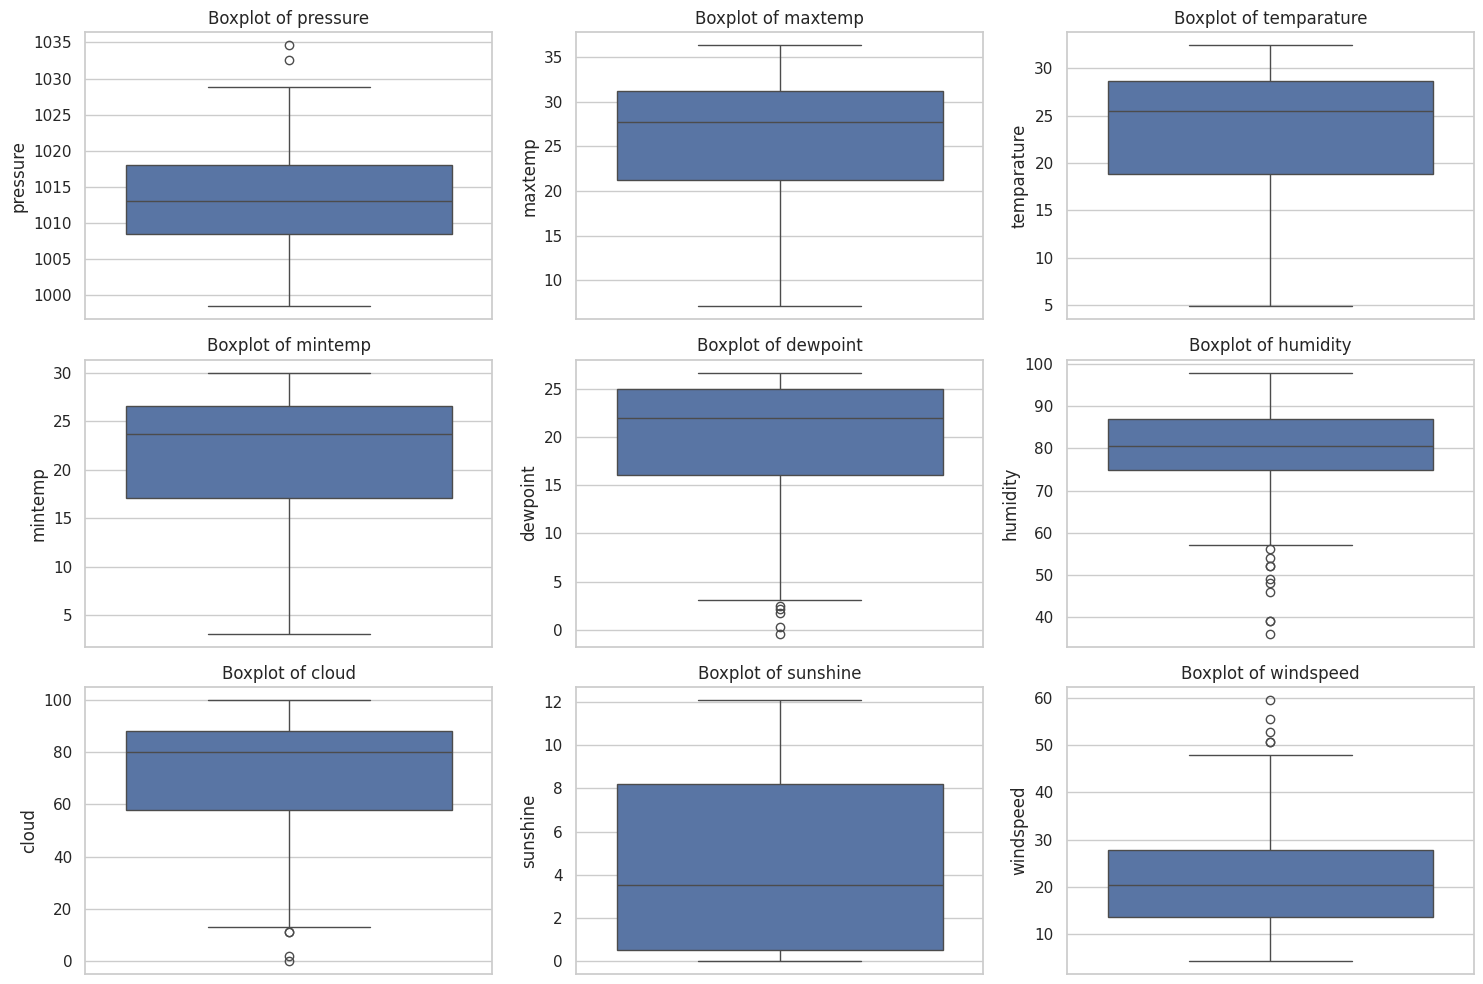

In [44]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

**DATA PREPROCESSING**

In [45]:
# drop highly correlated column
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   dewpoint       366 non-null    float64
 2   humidity       366 non-null    int64  
 3   cloud          366 non-null    int64  
 4   rainfall       366 non-null    int64  
 5   sunshine       366 non-null    float64
 6   winddirection  366 non-null    float64
 7   windspeed      366 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 23.0 KB


In [48]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [49]:
# separate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [50]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [51]:
# downsample majority class to match minority count
#replace=false avoids duplicate values
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [53]:
df_majority_downsampled.shape

(117, 8)

In [54]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [55]:
df_downsampled.shape

(234, 8)

In [56]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [59]:
df_downsampled.tail()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
351,1025.9,-0.4,39,25,0,9.1,20.0,35.6
352,1026.4,3.1,48,11,0,9.5,40.0,25.2
353,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,1020.6,13.3,74,87,0,0.6,30.0,21.6
365,1026.4,13.0,74,66,0,5.7,20.0,23.3


In [61]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [62]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1004.2,26.6,81,88,1,2.4,220.0,30.0
1,1008.1,25.6,79,43,0,9.7,240.0,24.9
2,1027.1,3.4,70,95,1,0.0,20.0,55.5
3,1017.0,22.9,84,58,1,5.9,70.0,22.1
4,1011.3,20.9,70,45,1,7.1,20.0,20.4


In [64]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [70]:
# split features and target
X = df_downsampled.drop(columns=["rainfall"])
Y = df_downsampled["rainfall"]

In [71]:
print(X)
print(Y)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1004.2      26.6        81     88       2.4          220.0       30.0
1      1008.1      25.6        79     43       9.7          240.0       24.9
2      1027.1       3.4        70     95       0.0           20.0       55.5
3      1017.0      22.9        84     58       5.9           70.0       22.1
4      1011.3      20.9        70     45       7.1           20.0       20.4
..        ...       ...       ...    ...       ...            ...        ...
229    1014.1      25.4        97     86       0.4          100.0       30.4
230    1005.6      20.0        56     53      10.4          230.0       15.5
231    1002.2      25.5        77     70       7.7          350.0       13.6
232    1020.8       7.2        54     29      10.2           40.0       17.2
233    1002.4      24.3        70     48       7.8           10.0       11.0

[234 rows x 7 columns]
0      1
1      0
2      1
3      1
4      1
      .

In [72]:
# splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [75]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [76]:
best_rf_model = grid_search_rf.best_estimator_

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


**MODEL EVALUATION**

In [77]:
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.71052632 0.92105263 0.72972973 0.67567568 0.83783784]
Mean cross-validation score: 0.7749644381223328


In [79]:
# test set performance
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(Y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Test set Accuracy: 0.851063829787234
Test set Confusion Matrix:
 [[21  4]
 [ 3 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.83      0.86      0.84        22

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.85      0.85      0.85        47



In [80]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [82]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [83]:
prediction = best_rf_model.predict(input_df)
print(prediction)

[1]


**Output->0  No Rainfall**

**Output-> 1  Rainfall**

In [87]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction == 1 else "No Rainfall")

Prediction result: Rainfall


In [88]:
# save model and feature names to a pickle file
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

In [89]:
import pickle
import pandas as pd

In [90]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [91]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [92]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall
